In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_plot import plot_mean_std, plot_all_roc_curves, plot_all_pr_curves, plot_all_comparisons, print_latex_performance

# Loading NACC data
python inference.py --dataset_location data/nacc_scaled_corrected.csv --dataset_id nacc

python inference.py --dataset_location data/nacc_scaled_corrected.csv --dataset_id nacc --do_single_pass

For balanced run:

python inference.py --dataset_location data/nacc_scaled_corrected.csv --dataset_id nacc --wb_model_id 18wkp0n2

... and change file location from `latest_output_nacc_50.csv` to `latest_output_nacc_50_18wkp0n2.csv`

In [2]:
nacc_diag = pd.read_csv('../data/nacc_diagnosis.csv', index_col=0)
nacc_diag.shape

(5209, 1)

In [ ]:
res_df = pd.read_csv('latest_output_nacc_50.csv', index_col=0)
res_df

In [ ]:
joined_df = res_df.join(nacc_diag, how='inner')
joined_df

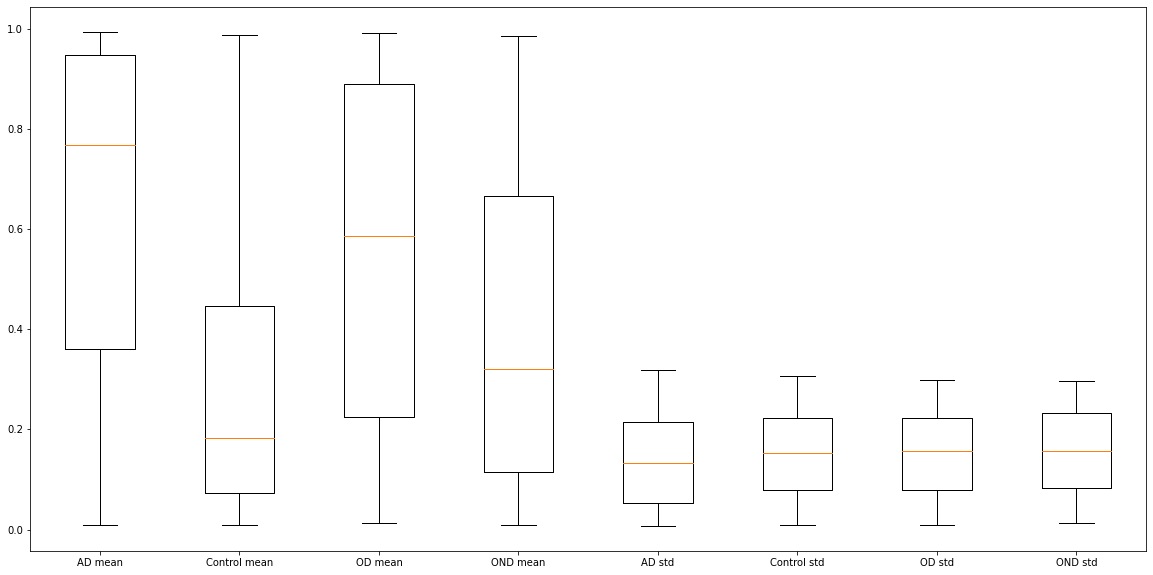

In [5]:
plt.subplots(figsize=(20, 10))
all_data = [joined_df[joined_df.diagnosis == 'AD']['mean'].values, 
            joined_df[joined_df.diagnosis == 'Control']['mean'].values,
            joined_df[joined_df.diagnosis == 'OD']['mean'].values,
            joined_df[joined_df.diagnosis == 'OND']['mean'].values,
            ##
            joined_df[joined_df.diagnosis == 'AD']['std'].values,
            joined_df[joined_df.diagnosis == 'Control']['std'].values,
            joined_df[joined_df.diagnosis == 'OD']['std'].values,
            joined_df[joined_df.diagnosis == 'OND']['std'].values,]


_ = plt.boxplot(all_data, labels=['AD mean', 'Control mean', 'OD mean', 'OND mean', 
                                  'AD std', 'Control std', 'OD std', 'OND std'])
plt.show()
plt.close()

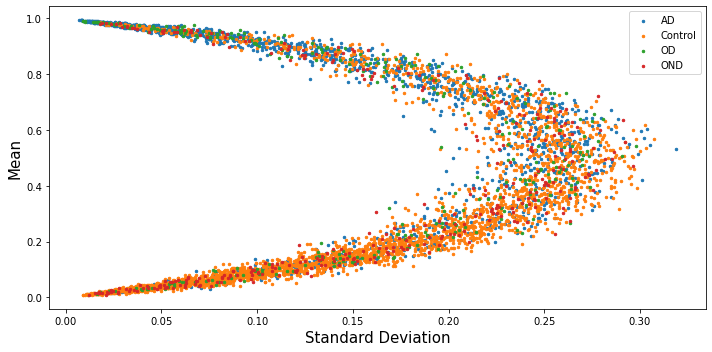

In [6]:
plot_mean_std(joined_df, ['AD', 'Control', 'OD', 'OND'], save_fig='figs/mean_std_nacc.png')

## Going for only AD/Control

In [7]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
joined_df = joined_df[(joined_df.diagnosis == 'AD') | (joined_df.diagnosis == 'Control')]
joined_df

In [ ]:
joined_df['diagnosis'] = 1 - LabelEncoder().fit_transform(joined_df['diagnosis'].copy())
joined_df

In [ ]:
single_pass = pd.read_csv('latest_output_nacc_1.csv', index_col=0)
single_pass = single_pass.join(nacc_diag, how='inner')
single_pass = single_pass[(single_pass.diagnosis == 'AD') | (single_pass.diagnosis == 'Control')]
single_pass['diagnosis'] = 1 - LabelEncoder().fit_transform(single_pass['diagnosis'].copy())
single_pass

In [ ]:
# Creating column of extremes to better evaluate distance to extremes and order
joined_df['extremes'] = joined_df['mean']
joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes'] = 1 - joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes']
joined_df

In [ ]:
single_pass['extremes'] = single_pass['mean']
single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes'] = 1 - single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes']
single_pass

# Performance Metrics

In [22]:
print_latex_performance(single_pass)

0.74 & 0.79 & 0.68 & 0.78 & 0.65 & 0.8 \\ 
0.2
0.2


In [13]:
print_latex_performance(joined_df)

0.74 & 0.79 & 0.68 & 0.78 & 0.65 & 0.8 \\ 
0.19
0.2


In [11]:
# Output for run 18wkp0n2 (balanced training set)
print_latex_performance(joined_df)

0.74 & 0.79 & 0.7 & 0.76 & 0.64 & 0.81 \\ 
0.19
0.19


## MC-Drop vs single-pass: AUC-ROC Curve

Best treshold for MC-Drop: 0.5115083456039429
Best treshold for Single Pass: 0.5637171864509583


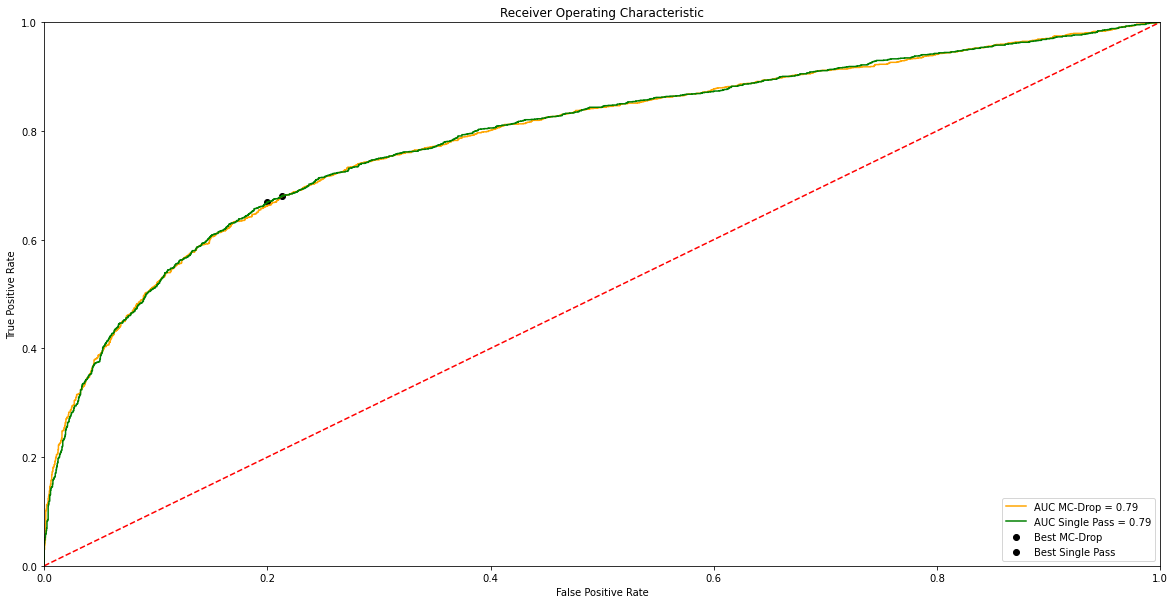

In [14]:
plot_all_roc_curves(joined_df, single_pass)

# MC-Drop (uncertainty) vs MC-Drop (delta) vs single-pass (delta)

## At threshold = 0.5

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


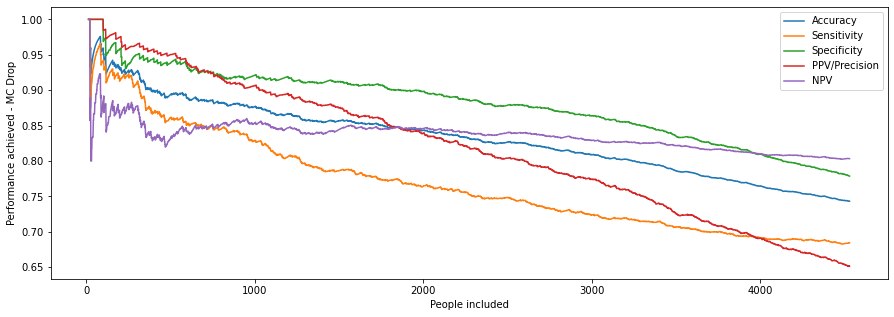

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


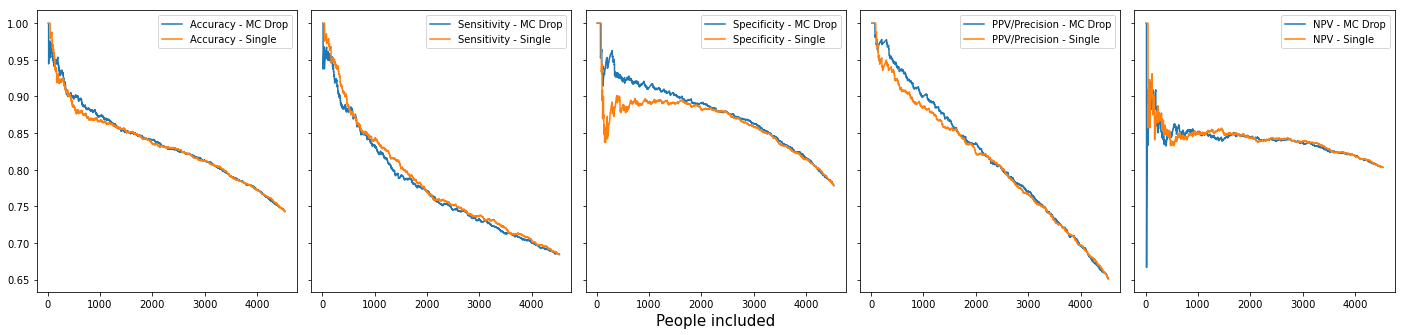

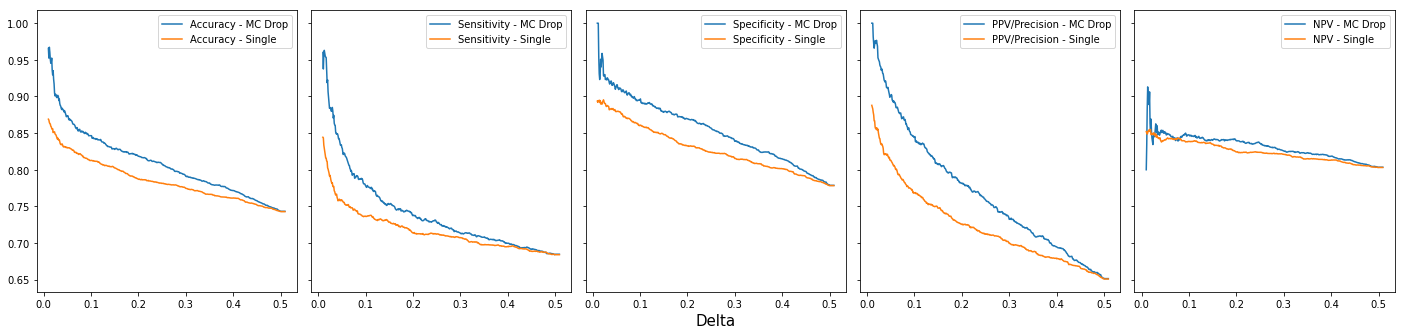

#####################################################################################
################# All 3 approaches together
#####################################################################################


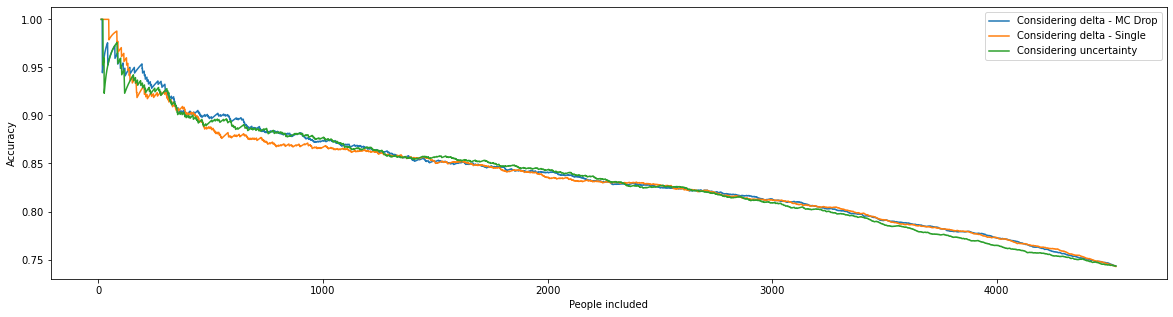

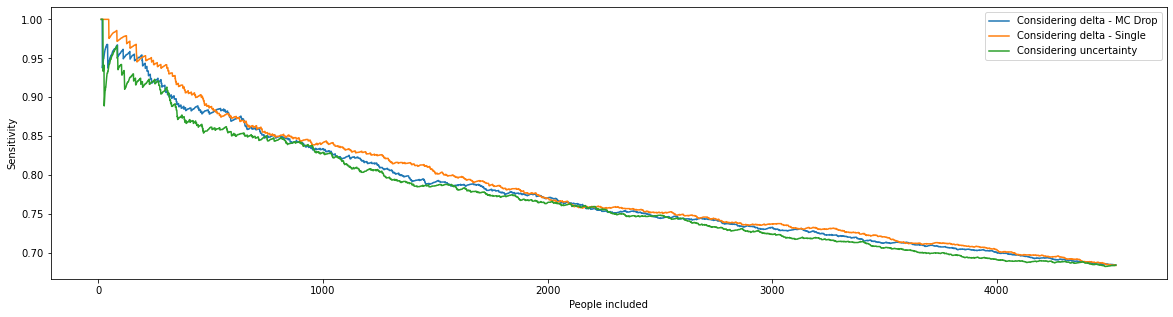

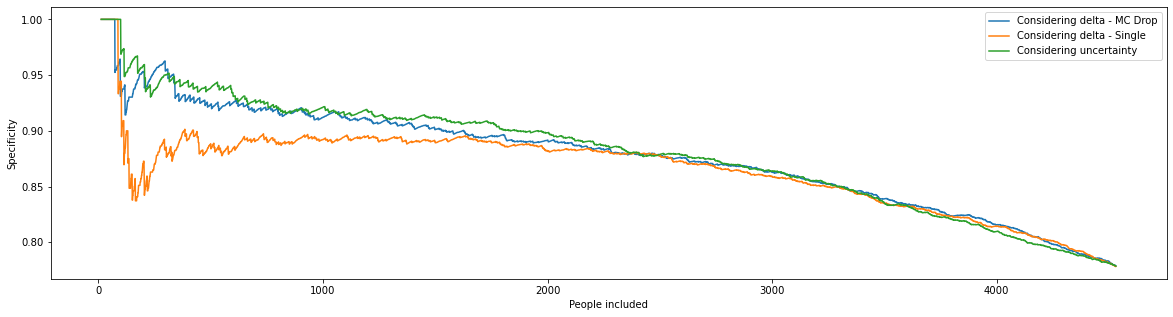

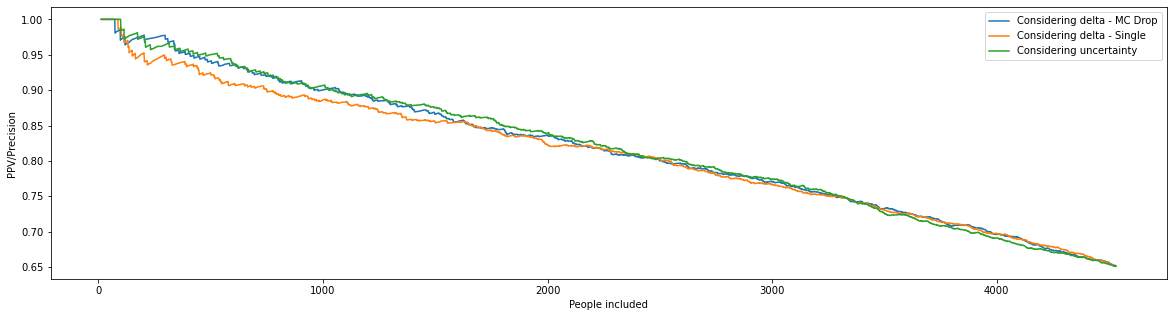

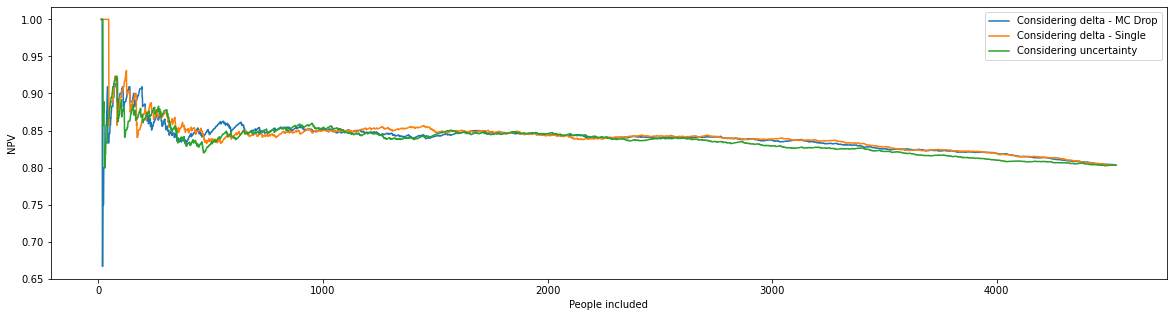

CPU times: user 1min 50s, sys: 124 ms, total: 1min 51s
Wall time: 1min 51s


In [16]:
%%time
plot_all_comparisons(joined_df, single_pass, threshold=0.5, starting_num_people=13, save_plot='figs/nacc_2_delta.pdf')

## At threshold = 0.582169

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


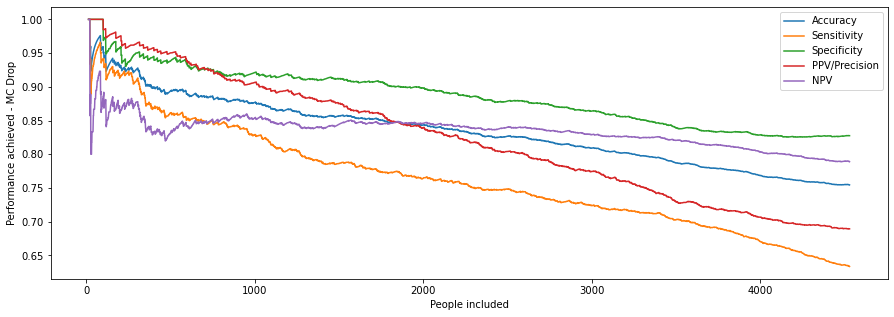

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


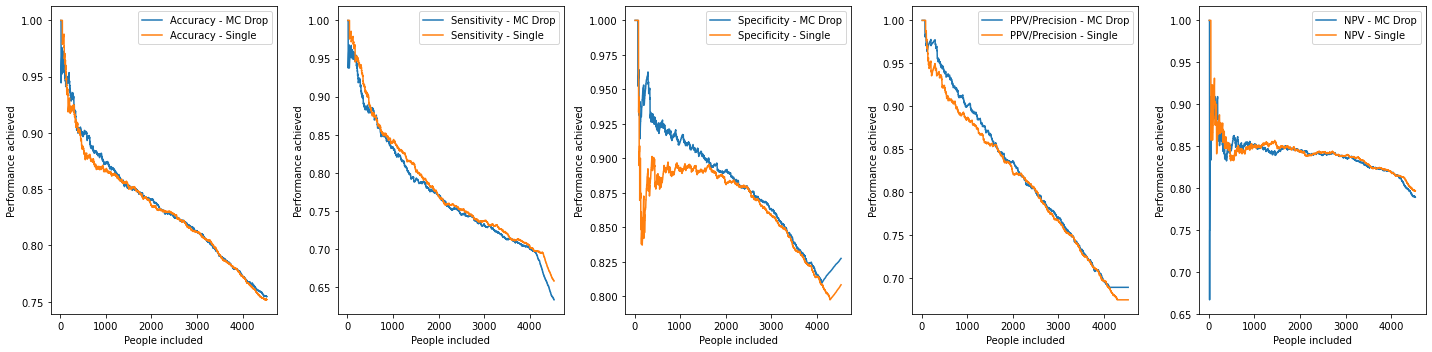

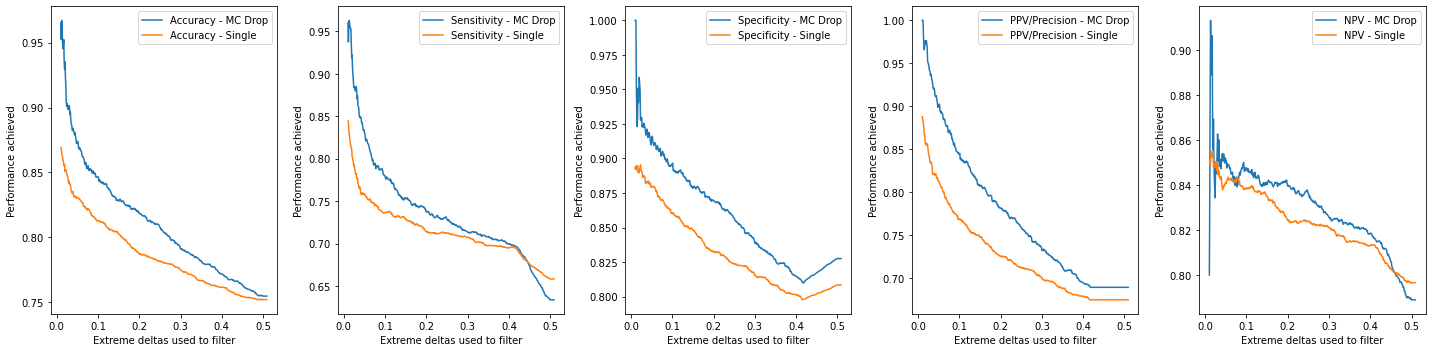

#####################################################################################
################# All 3 approaches together
#####################################################################################


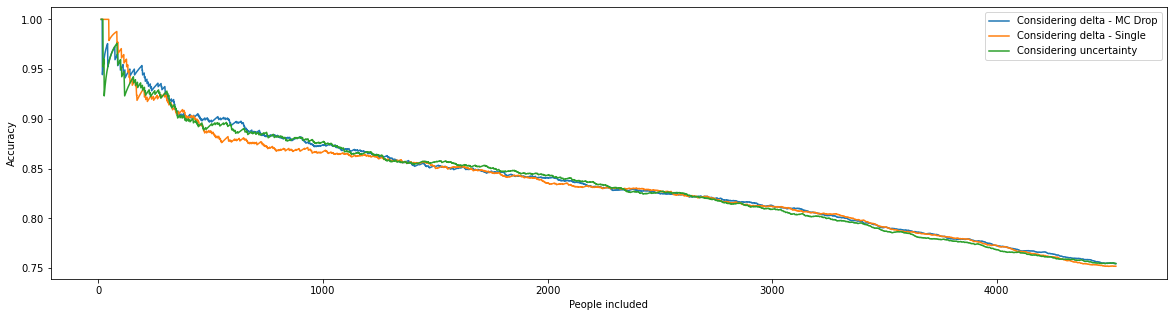

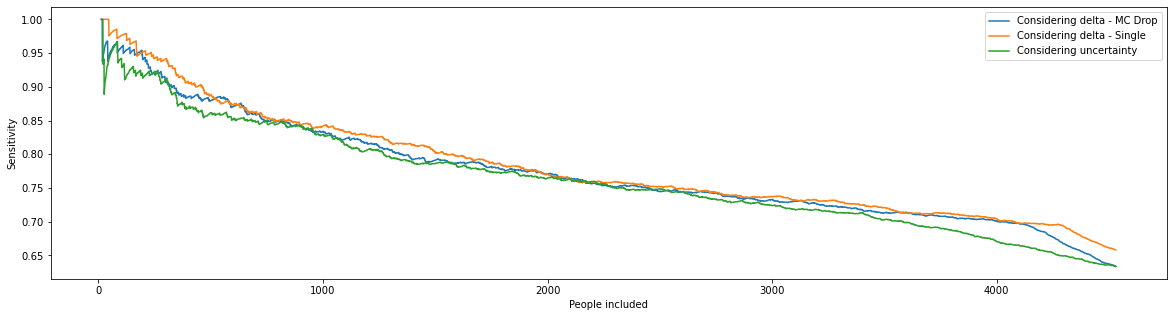

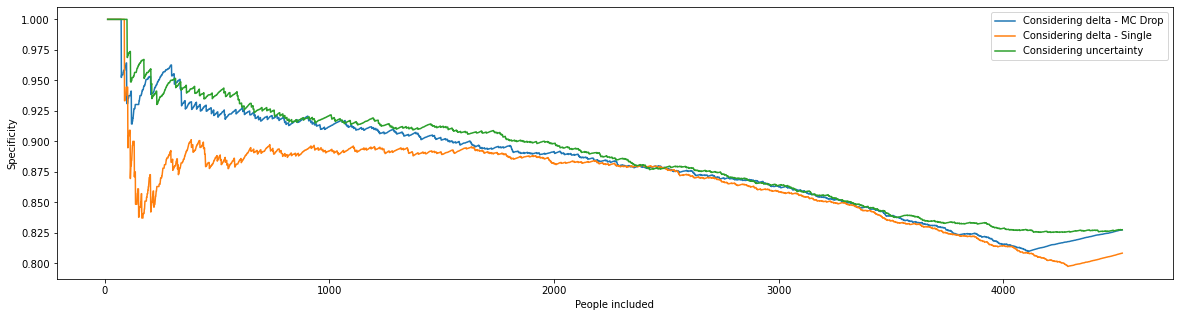

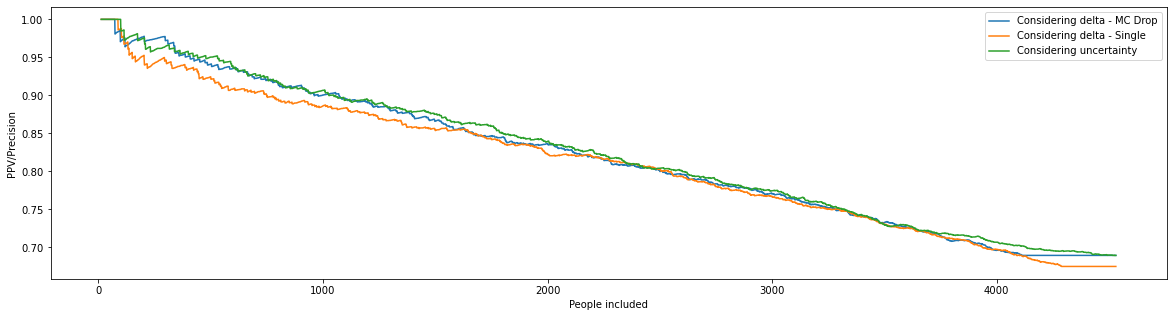

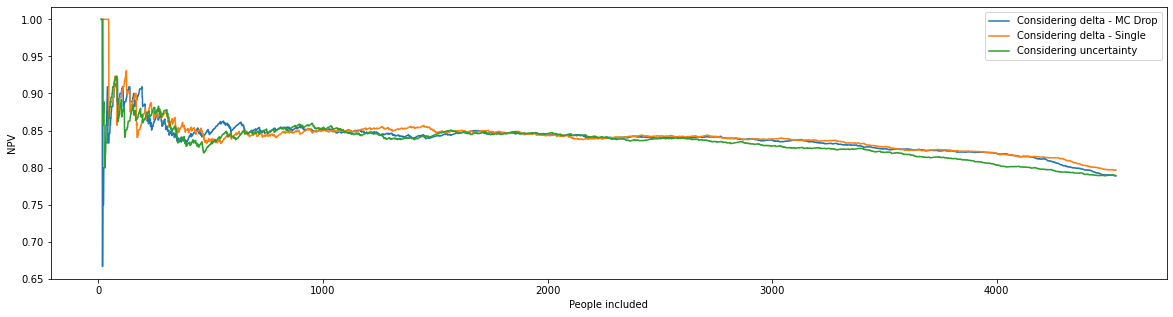

CPU times: user 1min 30s, sys: 100 ms, total: 1min 30s
Wall time: 1min 30s


In [15]:
%%time
plot_all_comparisons(joined_df, single_pass, threshold=0.582169, starting_num_people=13)